In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_pickle("machine_studies/summary_optimisersvsagents.pkl")

In [3]:
# Compute MAE
df["delta_mu_x"] = np.abs(df["mup_x"] - df["mu_x"])
df["delta_mu_y"] = np.abs(df["mup_y"] - df["mu_y"])
df["delta_sigma_x"] = np.abs(df["sigmap_x"] - df["sigma_x"])
df["delta_sigma_y"] = np.abs(df["sigmap_y"] - df["sigma_y"])
df["mae"] = (df["delta_mu_x"] + df["delta_mu_y"] + df["delta_sigma_x"] + df["delta_sigma_y"]) / 4

In [8]:
df[df["step"] == 50].groupby("method")["mae"].median() * 1e3

method
nelder-mead-initsimplex    0.137208
reinforcement-learning     0.040908
Name: mae, dtype: float64

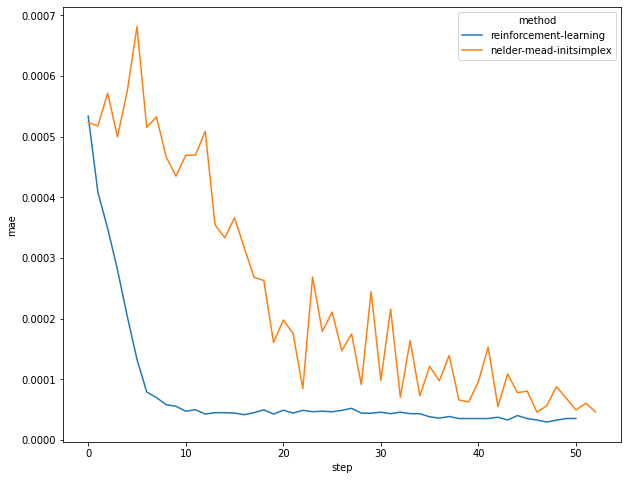

In [5]:
plt.figure(figsize=(10,8))
sns.lineplot(x="step", y="mae", hue="method", data=df[df["problem"] == 0])
plt.show()

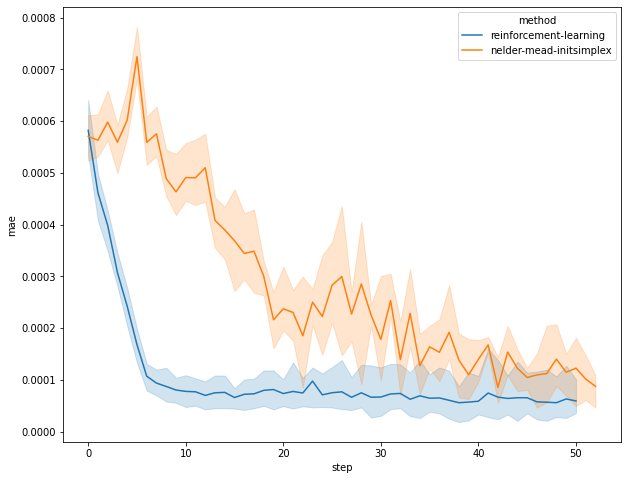

In [6]:
plt.figure(figsize=(10,8))
sns.lineplot(x="step", y="mae", hue="method", data=df)
plt.show()